%md
## MVP - Disciplina: Sprint: Engenharia de Dados
**Clara Delboni**

**Todo o relatório deste MVP consta anexado no diretório do Github.**

## Camada Gold

Nesta camada “Gold” irei criar uma tabela a partir de Joins das tabelas fundamentais da camada “Silver”, sendo elas a tabela fato de pedidos, DimPagamentos, DimItens, DimProdutos, DimVendedores e DimClientes. A criação desta tabela flat tem como objetivo otimizar a performance de leitura e análise dos dados para este estudo, além de facilitar o seu consumo, permitindo assim responder de forma mais eficiente às perguntas definidas no início do projeto. Ainda assim, em caso de novas demandas analíticas, é possível recorrer à camada Silver, que mantém as tabelas organizadas em um modelo de esquema em floco de neve.

In [0]:
%sql
CREATE DATABASE IF NOT EXISTS Gold;

In [0]:
%sql SELECT * FROM Silver.fatopedidos_final

order_id customer_id order_status total_items total_order_item_value total_freight_value total_order_value order_purchase_timestamp_new order_approved_at_new order_delivered_carrier_date_new order_delivered_customer_date_new order_estimated_delivery_date_new b513b10ef81dc22d15e850789a8a96b1 fa3c9c28979e812523cac4180cf5bbca delivered 1 179.00 18.53 197.53 2018-02-25 2018-02-27 2018-02-27 2018-03-08 2018-03-21 2d58f989c5e9344556ea2a9526699249 1fc09040150013ea0ef014f02dcb4e97 delivered 1 89.99 16.39 106.38 2017-10-01 2017-10-01 2017-10-04 2017-10-10 2017-10-27 a92225110bfd8206a036f272ccf0fb1b 7f96cdc06aa0cfe77e71187d5035f22f delivered 1 49.00 18.23 67.23 2018-05-03 2018-05-03 2018-05-04 2018-05-15 2018-06-04 d17a342bb9f94d40c3b6df4a600b5cee 511dfb4f5249ddae8cec62d7c650859c delivered 2 59.98 14.78 74.76 2018-04-06 2018-04-06 2018-04-09 2018-04-10 2018-04-24 8dd9758206f8d9c23baf77b965e1c6dc 849d4f35271a07987c6af0c676c5ca31 delivered 1 84.99 15.35 100.34 2017-11-28 2017-11-28 2017-12-04 2017-12-19 2017-12-20 7c4281b08578a1e5e13e56814b3c6123 686ba249f6f98cc2610b58e5b9982e6a delivered 1 157.00 18.00 175.00 2017-07-18 2017-07-18 2017-07-19 2017-07-24 2017-08-24 2b9c1a6934f2dd62cbe6df11189fb65f 82c5e6b98e498b4150818c913f3e9bc7 delivered 1 74.90 12.65 87.55 2018-02-10 2018-02-10 2018-02-21 2018-02-28 2018-03-14 0b93ff37e8344c6013bad16484c7fbe4 41b40faae6aeea7a8b6884948863386e delivered 1 998.90 222.38 1221.28 2018-07-22 2018-07-23 2018-08-02 2018-08-07 2018-08-21 b311d7dd519074ae07f219467efbcc6c 958cac30fa94b05f7747e91ed8798ef8 delivered 1 79.90 9.47 89.37 2018-06-10 2018-06-10 2018-06-19 2018-06-20 2018-06-29 f9b9c3c69ef08b6eda32ed086133abb6 2ee87cede5826cd6458393028d3ec739 delivered 1 48.90 9.74 58.64 2018-02-14 2018-02-14 2018-02-16 2018-02-19 2018-03-01 e37ef4ac61b5803ac29b4056c8495108 3336317767e51b209329188eb22de872 delivered 1 38.90 16.79 55.69 2017-11-26 2017-11-26 2017-11-27 2017-12-13 2017-12-26 5ded9a59e8920225f45b1d0e11dc7d97 807ef2b1870358b473e99027f30f2064 delivered 1 49.00 10.96 59.96 2017-04-28 2017-04-28 2017-05-02 2017-05-20 2017-05-22 2b31af271f3efcfd1f240a6ba82c631e f7be82a2745ab37efb4f956c800a734e delivered 1 161.42 38.60 200.02 2018-07-10 2018-07-10 2018-07-11 2018-07-12 2018-07-20 b80623966e8021f8f60984a3646abe70 cdf78a4b4403020ccadf1c716f28e89c delivered 1 129.99 18.16 148.15 2017-08-11 2017-08-15 2017-08-15 2017-08-21 2017-09-04 a97a2be3f668f7c6d75a218b2dba8720 c3494677ed240d91c99a1011ca05bbf9 delivered 1 179.90 21.53 201.43 2018-08-02 2018-08-02 2018-08-03 2018-08-17 2018-08-29 fdf9e48108cf744c38b7e25e1801e6c6 868c2c47163497b50be2e28d3ea04787 delivered 1 799.00 20.35 819.35 2017-08-05 2017-08-05 2017-08-07 2017-08-21 2017-08-29 1d7f3280ef428fd4fb454e6d0d1fef43 e587dd5e730f4af7337801d98bd17b6b delivered 1 58.90 26.95 85.85 2018-01-31 2018-01-31 2018-02-03 2018-02-20 2018-03-02 d579ab4fe27352cb09cfa39a9e4f25f4 4013e6a6ae8c0476d72909e1f5de3d70 delivered 1 150.00 8.30 158.30 2018-01-22 2018-01-22 2018-01-31 2018-02-05 2018-02-06 b268bc99a523c42dc0bfe0149cd1446f 666c901345a407213ee5493214b87fc0 delivered 1 27.90 18.30 46.20 2018-06-28 2018-06-28 2018-06-28 2018-07-03 2018-07-23 93be3c680089cedbd7306a23dba47168 f3edd744e7890de622cd78447f343d0f delivered 1 5.99 14.10 20.09 2018-02-26 2018-02-26 2018-02-28 2018-03-06 2018-03-16 199c3d5d5456786637603c3975e504f3 526441615839170e46ce165be2760060 delivered 1 157.49 12.31 169.80 2018-02-25 2018-02-25 2018-02-26 2018-02-28 2018-03-12 acb09adeef280bd9475bbc0fed1eb8ee 0de3df89f5aafcdb82290027e375d72b delivered 1 55.00 7.78 62.78 2017-09-14 2017-09-15 2017-09-15 2017-09-18 2017-09-26 6419e8e9d7f16635d9222eec191ce516 a7532e354c1895123fff8168ec3c3c1e delivered 1 49.00 14.10 63.10 2018-03-01 2018-03-01 2018-03-02 2018-03-13 2018-03-20 f86643e121f874b9e8e2223a04c79433 e551243e032114d31747d08408a73bd2 delivered 1 110.00 18.65 128.65 2018-04-26 2018-04-26 2018-04-27 2018-05-02 2018-05-24 f510fda0bfc99dc2ea6e0354a36c3f80 494dd794d228c8012ce6ffe29abb4478 delivered 1 179.99 45.72 225.71 

Número de pedidos cancelados

In [0]:
%sql
SELECT
    COUNT(*) AS total_cancelados
FROM 
    Silver.fatopedidos_final
WHERE
    order_status = 'canceled';

total_cancelados 625

Taxa de cancelamento

In [0]:
%sql
SELECT
    (COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) * 100.0) / COUNT(*) AS taxa_cancelamento
FROM
    Silver.fatopedidos_final;

taxa_cancelamento 0.62851338984926

Criando tabela com junção entre tabelas para a camada gold

In [0]:
%sql
CREATE OR REPLACE TABLE Gold.dados_agregados 
USING DELTA
AS
SELECT
    fp.order_id AS order_id,  
    fp.customer_id AS customer_id,
    fp.order_status,   
    fp.total_items,
    fp.total_order_item_value,
    fp.total_freight_value, 
    fp.total_order_value,
    fp.order_purchase_timestamp_new,
    fp.order_approved_at_new,
    fp.order_delivered_carrier_date_new,
    fp.order_delivered_customer_date_new,
    fp.order_estimated_delivery_date_new,
    
    dt.payment_value, 
    dt.payment_type,                 

    di.product_id,
    di.price,
    
    dp.product_category_name,

    dv.seller_id,
    dv.seller_city,

    dc.customer_unique_id
                             
FROM 
    Silver.fatopedidos_final fp
JOIN
    Silver.dimpagamentos_final dt ON fp.order_id = dt.order_id  
JOIN 
    Silver.dimitens_final di ON fp.order_id = di.order_id  
JOIN 
    Silver.DimProdutos dp ON di.product_id = dp.product_id
JOIN
    Silver.DimVendedores dv ON di.seller_id = dv.seller_id
JOIN
    Silver.DimClientes dc ON fp.customer_id = dc.customer_id;

num_affected_rows num_inserted_rows

In [0]:
%sql SELECT * FROM Gold.dados_agregados LIMIT 10

order_id customer_id order_status total_items total_order_item_value total_freight_value total_order_value order_purchase_timestamp_new order_approved_at_new order_delivered_carrier_date_new order_delivered_customer_date_new order_estimated_delivery_date_new payment_value payment_type product_id price product_category_name seller_id seller_city customer_unique_id b513b10ef81dc22d15e850789a8a96b1 fa3c9c28979e812523cac4180cf5bbca delivered 1 179.00 18.53 197.53 2018-02-25 2018-02-27 2018-02-27 2018-03-08 2018-03-21 197.53 boleto f8b624d4e475bb8d1bddf1b65c6a64f6 179.00 utilidades_domesticas b410bdd36d5db7a65dcd42b7ead933b8 goiania 8e45fca580e5130b6f912da95dcf3dd2 2d58f989c5e9344556ea2a9526699249 1fc09040150013ea0ef014f02dcb4e97 delivered 1 89.99 16.39 106.38 2017-10-01 2017-10-01 2017-10-04 2017-10-10 2017-10-27 106.38 credit_card 504f07e36481e5e72043def3d874b92a 89.99 esporte_lazer 2e1c9f22be269ef4643f826c9e650a52 sao paulo d9d377accc816fe2dd7cea89daefdbc3 a92225110bfd8206a036f272ccf0fb1b 7f96cdc06aa0cfe77e71187d5035f22f delivered 1 49.00 18.23 67.23 2018-05-03 2018-05-03 2018-05-04 2018-05-15 2018-06-04 67.23 credit_card 7f064525eaaa1ce9d22c085f7ff5413a 49.00 relogios_presentes 6560211a19b47992c3666cc44a7e94c0 sao paulo 2c1e1a424b3426cfb207bc61849b4203 d17a342bb9f94d40c3b6df4a600b5cee 511dfb4f5249ddae8cec62d7c650859c delivered 2 59.98 14.78 74.76 2018-04-06 2018-04-06 2018-04-09 2018-04-10 2018-04-24 74.76 credit_card 5df6b48d02fedad4728b254cfcff3cc7 29.99 telefonia b76dba6c951ab00dc4edf0a1aa88037e sao paulo 9f7e43e32a3faca81cd43ee54af11543 d17a342bb9f94d40c3b6df4a600b5cee 511dfb4f5249ddae8cec62d7c650859c delivered 2 59.98 14.78 74.76 2018-04-06 2018-04-06 2018-04-09 2018-04-10 2018-04-24 74.76 credit_card 5df6b48d02fedad4728b254cfcff3cc7 29.99 telefonia b76dba6c951ab00dc4edf0a1aa88037e sao paulo 9f7e43e32a3faca81cd43ee54af11543 8dd9758206f8d9c23baf77b965e1c6dc 849d4f35271a07987c6af0c676c5ca31 delivered 1 84.99 15.35 100.34 2017-11-28 2017-11-28 2017-12-04 2017-12-19 2017-12-20 17.71 credit_card 4c2394abfbac7ff59ec7a420918562fa 84.99 beleza_saude cc419e0650a3c5ba77189a1882b7556a santo andre a4d4c09a2fe3081414f20b73ed30d9de 8dd9758206f8d9c23baf77b965e1c6dc 849d4f35271a07987c6af0c676c5ca31 delivered 1 84.99 15.35 100.34 2017-11-28 2017-11-28 2017-12-04 2017-12-19 2017-12-20 82.63 voucher 4c2394abfbac7ff59ec7a420918562fa 84.99 beleza_saude cc419e0650a3c5ba77189a1882b7556a santo andre a4d4c09a2fe3081414f20b73ed30d9de 7c4281b08578a1e5e13e56814b3c6123 686ba249f6f98cc2610b58e5b9982e6a delivered 1 157.00 18.00 175.00 2017-07-18 2017-07-18 2017-07-19 2017-07-24 2017-08-24 175.00 credit_card 3458b4c1fcbe46e2eedb48e00960a60e 157.00 cama_mesa_banho cfb1a033743668a192316f3c6d1d2671 votorantim 70a8db6a5ae17c3a4e5df68bbeae451c 2b9c1a6934f2dd62cbe6df11189fb65f 82c5e6b98e498b4150818c913f3e9bc7 delivered 1 74.90 12.65 87.55 2018-02-10 2018-02-10 2018-02-21 2018-02-28 2018-03-14 87.55 credit_card e53e557d5a159f5aa2c5e995dfdf244b 74.90 informatica_acessorios 88460e8ebdecbfecb5f9601833981930 maringa 0520a11c7af8a73b703f1d2e722c7c8a 0b93ff37e8344c6013bad16484c7fbe4 41b40faae6aeea7a8b6884948863386e delivered 1 998.90 222.38 1221.28 2018-07-22 2018-07-23 2018-08-02 2018-08-07 2018-08-21 1221.28 credit_card be7af429d53adfab190dacdaad6a1c9b 998.90 papelaria b19f3ca2ea475913750f25a5c37c8d8f divinopolis 8733d5194de65480195c9afdc3bf8881

Desempenho produtos - categorias que têm as maiores vendas em termos de unidades e valor

In [0]:
%sql
SELECT
    product_category_name,
    SUM(total_items) AS total_units_sold,  
    ROUND(SUM(payment_value), 2) AS total_sales_value  
FROM 
    Gold.dados_agregados
GROUP BY
    product_category_name  
ORDER BY 
    total_sales_value DESC
LIMIT 20;

product_category_name total_units_sold total_sales_value cama_mesa_banho 17268 1712553.67 beleza_saude 12873 1657373.12 informatica_acessorios 12292 1585330.45 moveis_decoracao 15402 1430176.39 relogios_presentes 7418 1429216.68 esporte_lazer 11604 1392127.56 utilidades_domesticas 11677 1094758.13 automotivo 5714 852294.33 ferramentas_jardim 7682 838280.75 cool_stuff 4591 779698.00 moveis_escritorio 3519 646826.49 brinquedos 4948 619037.69 bebes 3946 539845.66 perfumaria 4307 506738.66 telefonia 5966 486882.05 papelaria 3207 317440.07 pet_shop 2705 311268.97 pcs 284 279121.55 eletronicos 3505 259857.10 null 2277 252801.71

Categorias que possuem o maior número de cancelamentos

In [0]:
%sql
SELECT
    product_category_name,
    COUNT(*) AS cancellation_count
FROM
    Gold.dados_agregados
WHERE
    order_status = 'canceled'  
GROUP BY
    product_category_name
ORDER BY
    cancellation_count DESC; 

product_category_name cancellation_count utilidades_domesticas 59 esporte_lazer 52 informatica_acessorios 46 beleza_saude 40 moveis_decoracao 37 brinquedos 34 automotivo 30 relogios_presentes 21 bebes 20 ferramentas_jardim 20 telefonia 19 cama_mesa_banho 18 cool_stuff 17 null 15 perfumaria 15 papelaria 14 instrumentos_musicais 11 eletronicos 11 consoles_games 10 eletroportateis 8 livros_interesse_geral 7 fashion_bolsas_e_acessorios 6 construcao_ferramentas_seguranca 5 pet_shop 5 telefonia_fixa 4 construcao_ferramentas_jardim 4 malas_acessorios 4 eletrodomesticos_2 3 dvds_blu_ray 3 moveis_cozinha_area_de_servico_jantar_e_jardim 2 moveis_sala 2 eletrodomesticos 2 climatizacao 2 alimentos_bebidas 2 construcao_ferramentas_iluminacao 2 construcao_ferramentas_construcao 2 fashion_calcados 2 artes 1 casa_construcao 1 portateis_cozinha_e_preparadores_de_alimentos 1 moveis_escritorio 1 audio 1 fashion_roupa_masculina 1 fraldas_higiene 1 market_place 1 bebidas 1 pc_gamer 1 alimentos 1 artigos_de_natal 1

Categorias que possuem a maior taxa de cancelamento

In [0]:
%sql
SELECT
    product_category_name,
    COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) AS cancellation_count, 
    COUNT(*) AS total_orders,
    ROUND((COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) * 100.0) / COUNT(*), 2) AS cancellation_rate  
FROM
    Gold.dados_agregados
GROUP BY
    product_category_name
ORDER BY
    cancellation_rate DESC;  

product_category_name cancellation_count total_orders cancellation_rate pc_gamer 1 10 10.00 portateis_cozinha_e_preparadores_de_alimentos 1 15 6.67 dvds_blu_ray 3 71 4.23 fraldas_higiene 1 39 2.56 construcao_ferramentas_seguranca 5 199 2.51 construcao_ferramentas_jardim 4 245 1.63 instrumentos_musicais 11 718 1.53 telefonia_fixa 4 271 1.48 livros_interesse_geral 7 565 1.24 eletroportateis 8 701 1.14 eletrodomesticos_2 3 268 1.12 null 15 1698 0.88 consoles_games 10 1191 0.84 brinquedos 34 4273 0.80 utilidades_domesticas 59 7355 0.80 fashion_calcados 2 274 0.73 fashion_roupa_masculina 1 145 0.69 automotivo 30 4379 0.69 alimentos_bebidas 2 289 0.69 moveis_cozinha_area_de_servico_jantar_e_jardim 2 298 0.67 climatizacao 2 302 0.66 artigos_de_natal 1 155 0.65 construcao_ferramentas_iluminacao 2 313 0.64 bebes 20 3196 0.63 esporte_lazer 52 8945 0.58 informatica_acessorios 46 8082 0.57 papelaria 14 2617 0.53 artes 1 219 0.46 ferramentas_jardim 20 4574 0.44 cool_stuff 17 3987 0.43 moveis_decoracao 37 8744 0.42 perfumaria 15 3560 0.42 beleza_saude 40 9972 0.40 telefonia 19 4721 0.40 eletronicos 11 2845 0.39 moveis_sala 2 528 0.38 malas_acessorios 4 1163 0.34 relogios_presentes 21 6201 0.34 market_place 1 332 0.30 fashion_bolsas_e_acessorios 6 2151 0.28 audio 1 380 0.26 bebidas 1 386 0.26 eletrodomesticos 2 788 0.25 pet_shop 5 2028 0.25 construcao_ferramentas_construcao 2 951 0.21 alimentos 1 526 0.19 casa_construcao 1 634 0.16 cama_mesa_banho 18 11823 0.15 moveis_escritorio 1 1778 0.06 pcs 0 220 0.00 cine_foto 0 73 0.00 tablets_impressao_imagem 0 87 0.00 artigos_de_festas 0 46 0.00 la_cuisine 0 16 0.00 flores 0 33 0.00 livros_tecnicos 0 270 0.00 livros_importados 0 62 0.00 moveis_colchao_e_estofado 0 41 0.00 fashion_roupa_feminina 0 48 0.00 industria_comercio_e_negocios 0 271 0.00 fashion_roupa_infanto_juvenil 0 8 0.00 fashion_underwear_e_moda_praia 0 144 0.00 artes_e_artesanato 0 24 0.00 moveis_quarto 0 125 0.00 agro_industria_e_comercio 0 252 0.00 seguros_e_servicos 0 2 0.00 cds_dvds_musicais 0 14 0.00 portateis_casa_forno_e_cafe 0 78 0.00 sinalizacao_e_seguranca 0 201 0.00 casa_conforto_2 0 31 0.00 musica 0 40 0.00 casa_conforto 0 475 0.00 fashion_esporte 0 30 0.00 construcao_ferramentas_ferramentas 0 105 0.00

Taxa de cancelamento por cidade

In [0]:
%sql
SELECT
    seller_city,
    COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) AS num_cancellations, 
    COUNT(*) AS num_orders, 
    (COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) * 100.0) / COUNT(*) AS cancellation_rate  
FROM
    Gold.dados_agregados
GROUP BY
    seller_city
ORDER BY
    num_cancellations DESC;

seller_city num_cancellations num_orders cancellation_rate sao paulo 168 29157 0.57619096614878 santo andre 19 3095 0.61389337641357 campinas 16 1455 1.09965635738832 belo horizonte 16 2679 0.59723777528929 sorocaba 15 639 2.34741784037559 curitiba 14 3134 0.44671346522017 rio de janeiro 14 2529 0.55357848952155 guarulhos 13 2438 0.53322395406071 sao jose dos campos 11 828 1.32850241545894 sao jose do rio preto 11 2682 0.41014168530947 ibitinga 10 8242 0.12132977432662 florianopolis 10 259 3.86100386100386 ribeirao preto 10 2364 0.42301184433164 pederneiras 9 17 52.94117647058824 barueri 8 491 1.62932790224033 petropolis 8 870 0.91954022988506 borda da mata 7 558 1.25448028673835 louveira 7 148 4.72972972972973 marilia 6 240 2.50000000000000 sao bernardo do campo 6 1181 0.50804403048264 maringa 6 2259 0.26560424966799 itatiba 6 494 1.21457489878543 porto ferreira 6 232 2.58620689655172 claudio 5 143 3.49650349650350 taboao da serra 5 81 6.17283950617284 guara 5 270 1.85185185185185 atibaia 4 633 0.63191153238547 osasco 4 630 0.63492063492063 araguari 4 561 0.71301247771836 congonhal 4 115 3.47826086956522 blumenau 4 506 0.79051383399209 campo limpo paulista 4 1254 0.31897926634769 divinopolis 3 143 2.09790209790210 ilicinea 3 808 0.37128712871287 itajai 3 273 1.09890109890110 jaguariuna 3 70 4.28571428571429 maua 3 513 0.58479532163743 jacarei 3 1008 0.29761904761905 franca 3 681 0.44052863436123 capivari 3 183 1.63934426229508 brasilia 3 908 0.33039647577093 colorado 3 10 30.00000000000000 santos 2 585 0.34188034188034 cotia 2 240 0.83333333333333 pocos de caldas 2 127 1.57480314960630 riberao preto 2 276 0.72463768115942 pedreira 2 749 0.26702269692924 sao caetano do sul 2 180 1.11111111111111 joinville 2 719 0.27816411682893 ararangua 2 6 33.33333333333333 uba 2 243 0.82304526748971 ribeirao pires 2 239 0.83682008368201 ponta grossa 2 25 8.00000000000000 bauru 2 196 1.02040816326531 londrina 2 414 0.48309178743961 goiania 2 300 0.66666666666667 scao jose do rio pardo 2 65 3.07692307692308 piracicaba 2 2011 0.09945300845351 itaquaquecetuba 2 1750 0.11428571428571 salto 2 1397 0.14316392269148 araraquara 2 241 0.82987551867220 carapicuiba 1 222 0.45045045045045 jacutinga 1 112 0.89285714285714 votorantim 1 276 0.36231884057971 suzano 1 89 1.12359550561798 novo hamburgo 1 153 0.65359477124183 cerqueira cesar 1 20 5.00000000000000 pelotas 1 13 7.69230769230769 guariba 1 1186 0.08431703204047 praia grande 1 1355 0.07380073800738 guiricema 1 4 25.00000000000000 ubatuba 1 21 4.76190476190476 curitibanos 1 24 4.16666666666667 jaragua do sul 1 225 0.44444444444444 luziania 1 16 6.25000000000000 cascavel 1 559 0.17889087656530 castro 1 21 4.76190476190476 colombo 1 151 0.66225165562914 morrinhos 1 42 2.38095238095238 mogi guacu 1 237 0.42194092827004 sao carlos 1 170 0.58823529411765 rio do sul 1 212 0.47169811320755 uberaba 1 52 1.92307692307692 presidente prudente 1 444 0.22522522522523 ribeirao das neves 1 50 2.00000000000000 boituva 1 18 5.55555555555556 montenegro 1 149 0.67114093959732 aruja 1 35 2.85714285714286 alfenas 1 69 1.44927536231884 santa barbara d´oeste 1 369 0.27100271002710 criciuma 1 36 2.77777777777778 brejao 1 42 2.38095238095238 porto alegre 1 828 0.12077294685990 montes claros 1 6 16.66666666666667 amparo 1 116 0.86206896551724 armacao dos buzios 1 4 25.00000000000000 limeira 1 970 0.10309278350515 bariri 1 36 2.77777777777778 sao roque 1 104 0.96153846153846 betim 1 317 0.31545741324921 votuporanga 1 145 0.68965517241379 arapongas 1 146 0.68493150684932 bom jesus dos perdoes 1 3 33.33333333333333 arraial d'ajuda (porto seguro) 1 31 3.22580645161290 rolandia 1 187 0.53475935828877 pato branco 1 10 10.00000000000000 fazenda rio grande 1 75 1.33333333333333 sao goncalo 1 382 0.26178010471204 artur nogueira 1 24 4.16666666666667 sumare 1 631 0.15847860538827 lagoa da prata 1 51 1.96078431372549 salvador 1 139 0.71942446043165 jau 1 461 0.21691973969631 tres coracoes 1 281 0.35587188612100 paraiso do sul 1 5 20.00

Tempo de entrega vs cancelamento - Tempo entre aprovação do pagamento e entrega ao cliente

In [0]:
%sql
SELECT -- Análise do tempo de entrega e sua relação com o cancelamento de pedidos
    order_id,
    order_status,
    order_approved_at_new,
    order_delivered_customer_date_new,
    DATEDIFF(order_delivered_customer_date_new, order_approved_at_new) AS delivery_time_days,
    CASE
        WHEN order_status = 'canceled' THEN 1
        ELSE 0
    END AS is_cancelled
FROM 
    Gold.dados_agregados
WHERE
    order_status = 'canceled'
    AND order_delivered_customer_date_new IS NOT NULL 
    AND order_approved_at_new IS NOT NULL
ORDER BY
    delivery_time_days DESC;

order_id order_status order_approved_at_new order_delivered_customer_date_new delivery_time_days is_cancelled 65d1e226dfaeb8cdc42f665422522d14 canceled 2016-10-04 2016-11-08 35 1 1950d777989f6a877539f53795b4c3c3 canceled 2018-02-19 2018-03-21 30 1 2c45c33d2f9cb8ff8b1c86cc28c11c30 canceled 2016-10-10 2016-11-09 30 1 8beb59392e21af5eb9547ae1a9938d06 canceled 2016-10-09 2016-10-19 10 1 dabf2b0e35b423f94618bf965fcb7514 canceled 2016-10-09 2016-10-16 7 1 770d331c84e5b214bd9dc70a10b829d0 canceled 2016-10-07 2016-10-14 7 1 dabf2b0e35b423f94618bf965fcb7514 canceled 2016-10-09 2016-10-16 7 1

Tempo de entrega ao transportador vs cancelamento - Tempo entre aprovação do pagamento e entrega ao transportador

In [0]:
%sql
SELECT 
    order_id,
    order_status,
    order_approved_at_new,
    order_delivered_carrier_date_new,
    DATEDIFF(order_delivered_carrier_date_new, order_approved_at_new) AS deliverytot_time_days,
    CASE
        WHEN order_status = 'canceled' THEN 1
        ELSE 0
    END AS is_cancelled
FROM 
    Gold.dados_agregados
WHERE
    order_status = 'canceled'
    AND order_delivered_carrier_date_new IS NOT NULL 
    AND order_approved_at_new IS NOT NULL
ORDER BY
    deliverytot_time_days DESC;

order_id order_status order_approved_at_new order_delivered_carrier_date_new deliverytot_time_days is_cancelled 1def7af24cb7182497acfd953f6dd88b canceled 2017-12-23 2018-01-30 38 1 65d1e226dfaeb8cdc42f665422522d14 canceled 2016-10-04 2016-10-25 21 1 2c0032906c603dcc21cd954828fa77d0 canceled 2018-02-06 2018-02-16 10 1 47e96b5cb6f0592d336b6bf8a817d1c3 canceled 2018-01-22 2018-02-01 10 1 9ec3685b1f21c7dfff4f656392b186dd canceled 2018-02-20 2018-02-27 7 1 854f8cb8dacdc3abc4cce7a7df6fcc1f canceled 2018-02-02 2018-02-08 6 1 854f8cb8dacdc3abc4cce7a7df6fcc1f canceled 2018-02-02 2018-02-08 6 1 fe9fae71b4fa7d05f1934adc54391f8d canceled 2018-02-15 2018-02-21 6 1 4472eca3b65b1dca5e0d59c0e4e0c6bc canceled 2018-02-10 2018-02-15 5 1 8beb59392e21af5eb9547ae1a9938d06 canceled 2016-10-09 2016-10-14 5 1 5abf37ab57e23f69a9c8ab98c4800273 canceled 2018-01-28 2018-02-01 4 1 2c45c33d2f9cb8ff8b1c86cc28c11c30 canceled 2016-10-10 2016-10-14 4 1 dabf2b0e35b423f94618bf965fcb7514 canceled 2016-10-09 2016-10-13 4 1 2db84a082bda455eb1da10727e7ca621 canceled 2018-02-02 2018-02-06 4 1 dabf2b0e35b423f94618bf965fcb7514 canceled 2016-10-09 2016-10-13 4 1 d0fcf3d6dcc18a5c4ac51f06a56ec683 canceled 2018-02-01 2018-02-05 4 1 c1049eef89915c6beb3604bf3d6588d7 canceled 2018-02-05 2018-02-09 4 1 e0b4e92a39bc8b93bc4ff121772819ea canceled 2018-02-01 2018-02-05 4 1 01e7cf79ff6fdb0a65634f714c67dd24 canceled 2018-02-15 2018-02-19 4 1 e0b4e92a39bc8b93bc4ff121772819ea canceled 2018-02-01 2018-02-05 4 1 770d331c84e5b214bd9dc70a10b829d0 canceled 2016-10-07 2016-10-11 4 1 943625151a5d8d00da80e96a90930e03 canceled 2018-02-17 2018-02-20 3 1 c7a5d101d4b6ed70eacc97c78158eadd canceled 2018-02-03 2018-02-06 3 1 714fb133a6730ab81fa1d3c1b2007291 canceled 2018-01-26 2018-01-29 3 1 cd94dbdc801da0cd93b0c8f33663973d canceled 2018-02-21 2018-02-24 3 1 936a199847ccb47438d3ae454d5e18d1 canceled 2018-02-02 2018-02-05 3 1 d7cc5fcfee9af53fcd78bb47e4e55584 canceled 2018-01-27 2018-01-30 3 1 8caf289ab5d7e3ec7b4522aa22dabbec canceled 2018-02-14 2018-02-17 3 1 4be69a31714c77604076ab0004055c6c canceled 2018-01-31 2018-02-03 3 1 7582b8c10039cceafcfe7b13e41a91e2 canceled 2018-02-07 2018-02-10 3 1 716bcd6dfe99970baf4aed2083136ed8 canceled 2018-02-03 2018-02-05 2 1 ba0f1e99132c6f69e4622597e9853599 canceled 2018-01-24 2018-01-26 2 1 cb599c234fc71be7c137179b6d473a30 canceled 2018-01-30 2018-02-01 2 1 7e30f6ae5435d7c05b487f7b5e1d61ba canceled 2018-02-28 2018-03-02 2 1 affcfd3067c168967157abe801a3c4ec canceled 2018-02-17 2018-02-19 2 1 8a9cce19aa49e055f2babb81d5a71c40 canceled 2018-02-03 2018-02-05 2 1 3af427dfb9464cd660ac27292bb5d30b canceled 2018-01-30 2018-02-01 2 1 dba741d70126a95feb85435175370edc canceled 2018-01-24 2018-01-26 2 1 66dbde751178d7674bd09f18b6d25006 canceled 2018-02-05 2018-02-07 2 1 41c3bd8a34828a1a9ed3bae14a535afe canceled 2018-01-24 2018-01-26 2 1 881a5cda3b897b035971e3fcfce58aa6 canceled 2018-01-31 2018-02-02 2 1 46eb75885eca03736c4188871c0a9ba3 canceled 2018-01-29 2018-01-31 2 1 9c83e5ae8ff2b5cad999c3dc6129a888 canceled 2018-03-03 2018-03-05 2 1 14904245b311483b6886be3c2e717e76 canceled 2018-02-12 2018-02-14 2 1 e248283e6b8ba09b05efea1000d9478b canceled 2018-03-03 2018-03-05 2 1 ab76f54a321a0431ef243b3b6865078b canceled 2018-02-04 2018-02-06 2 1 2f6492ebb2badd06db511b63ae7d7f55 canceled 2018-01-20 2018-01-22 2 1 3a129877493c8189c59c60eb71d97c29 canceled 2018-01-25 2018-01-26 1 1 6b5ccf5385890198c54fa97afe4812bc canceled 2018-01-30 2018-01-31 1 1 3a129877493c8189c59c60eb71d97c29 canceled 2018-01-25 2018-01-26 1 1 6ad336dba0613cde0e5717f50dc8c669 canceled 2018-01-25 2018-01-26 1 1 8f367420ab5fc7305b7383f29ef4ed4e canceled 2018-01-31 2018-02-01 1 1 a8a3eaaf155bc111acb10e0536a9e753 canceled 2018-02-08 2018-02-09 1 1 1950d777989f6a877539f53795b4c3c3 canceled 2018-02-19 2018-02-20 1 1 8d171a848151e69e8f090fdbb50d4010 canceled 2018-02-15 2018-02-16 1 1 885935156ba43094f3ae95f3c14e0381 canceled 2018-02-06 2018-02-07 1 1 9f0e70e8d046d9e0626bbdaf1aff88c4 canceled 2018-01-24 2018-01-25 1 1 5b4858f2

Tempo de entrega médio de pedidos cancelados versus não cancelados

In [0]:
%sql
SELECT
    CASE
        WHEN order_status = 'canceled' THEN 'Cancelado'
        ELSE 'Não Cancelado'
    END AS pedido_status,
    AVG(DATEDIFF(order_delivered_customer_date_new, order_approved_at_new)) AS avg_delivery_time_days
FROM 
    Gold.dados_agregados
WHERE
    order_delivered_customer_date_new IS NOT NULL 
    AND order_approved_at_new IS NOT NULL
GROUP BY
    pedido_status;

pedido_status avg_delivery_time_days Não Cancelado 11.904914269815324 Cancelado 18.0

Tempo de entrega vs cancelamento - Comparação entre a data estimada de entrega e a data real de entrega

In [0]:
%sql
SELECT
    order_id,
    order_status,
    order_estimated_delivery_date_new,
    order_delivered_customer_date_new,
    DATEDIFF(order_delivered_customer_date_new, order_estimated_delivery_date_new) AS delay_days
FROM 
    Gold.dados_agregados
WHERE
    order_status = 'canceled'
ORDER BY
    delay_days DESC;  

order_id order_status order_estimated_delivery_date_new order_delivered_customer_date_new delay_days 1950d777989f6a877539f53795b4c3c3 canceled 2018-03-09 2018-03-21 12 65d1e226dfaeb8cdc42f665422522d14 canceled 2016-11-25 2016-11-08 -17 2c45c33d2f9cb8ff8b1c86cc28c11c30 canceled 2016-12-08 2016-11-09 -29 8beb59392e21af5eb9547ae1a9938d06 canceled 2016-11-30 2016-10-19 -42 dabf2b0e35b423f94618bf965fcb7514 canceled 2016-11-30 2016-10-16 -45 dabf2b0e35b423f94618bf965fcb7514 canceled 2016-11-30 2016-10-16 -45 770d331c84e5b214bd9dc70a10b829d0 canceled 2016-11-29 2016-10-14 -46 fa6d0c0ef7a7849ab7847303d458df3c canceled 2018-03-14 null null f79644ec98219489ae16ee7aabac4ebb canceled 2018-05-17 null null 5a8a4dc28b16fb90469ad749f9535773 canceled 2018-03-23 null null dbbbc904081f8e928028432e2e3d7686 canceled 2016-12-14 null null 7c0659561e8e95e839b8a4f9f4b6fab9 canceled 2018-06-04 null null 0a0e76ba55e310fd24657a1f532b97c1 canceled 2018-07-20 null null 821c1b3c87d17a24efad81096bee5f09 canceled 2017-11-03 null null 66dbde751178d7674bd09f18b6d25006 canceled 2018-03-12 null null a9c8ac0c26c178f0ad33618f96225a01 canceled 2018-08-07 null null 9512251cbae0778ea863f6242d3e5789 canceled 2017-07-05 null null 5a8a4dc28b16fb90469ad749f9535773 canceled 2018-03-23 null null cb3d8a1cca3468a5e99f78eaf49bce40 canceled 2018-07-26 null null a9c8ac0c26c178f0ad33618f96225a01 canceled 2018-08-07 null null 854f8cb8dacdc3abc4cce7a7df6fcc1f canceled 2018-03-06 null null 3a129877493c8189c59c60eb71d97c29 canceled 2018-02-23 null null 854f8cb8dacdc3abc4cce7a7df6fcc1f canceled 2018-03-06 null null a9c8ac0c26c178f0ad33618f96225a01 canceled 2018-08-07 null null fe9fae71b4fa7d05f1934adc54391f8d canceled 2018-03-07 null null b41b68092121772821fcdd6f7fb1594c canceled 2017-03-15 null null 454a297f19c15e3f7a16c16961029402 canceled 2018-07-12 null null a9c8ac0c26c178f0ad33618f96225a01 canceled 2018-08-07 null null 671ac88df4b1b29a8c7a049140189bcd canceled 2018-07-05 null null 00310b0c75bb13015ec4d82d341865a4 canceled 2018-08-29 null null ded456690bcb2ffd4def86541479037f canceled 2018-08-29 null null a9c8ac0c26c178f0ad33618f96225a01 canceled 2018-08-07 null null 162b2345ef3cc0551c0a32058840a2ec canceled 2018-08-06 null null b159d0ce7cd881052da94fa165617b05 canceled 2017-03-30 null null 0c2bc0e5935dcca29a9e0cc2e5236a13 canceled 2017-12-01 null null 7114487751b14b1d7f547fefba1eec75 canceled 2017-12-12 null null da7af77d5f98212a8c1ad0b1c552f102 canceled 2017-08-18 null null 3a129877493c8189c59c60eb71d97c29 canceled 2018-02-23 null null da7af77d5f98212a8c1ad0b1c552f102 canceled 2017-08-18 null null 642a8a89c36a8b2f4884cd8e68168247 canceled 2017-11-27 null null 5bca61e411c4fcce08327a8efc371911 canceled 2018-07-11 null null 716bcd6dfe99970baf4aed2083136ed8 canceled 2018-03-01 null null 3bb82ee5c8d4849ec722da99ba1bf228 canceled 2017-12-13 null null 4c5e883786df8d555be4dc12f11d3fe7 canceled 2018-06-25 null null 1cee73866d7513dbc499639d14020ce4 canceled 2017-08-14 null null 13d341318c77969f10d77e1382957542 canceled 2018-08-08 null null 1decf741e38f6bb92236968ffff3b2dc canceled 2017-08-03 null null 8cb7144be7be61b57614e79ece54a225 canceled 2017-12-06 null null ee987bbabed0cc87dc5354eb2b661740 canceled 2018-08-15 null null f5f8998eee8ec7bc513dc52847d64ce0 canceled 2018-03-20 null null 1057bf6391c17f9b6960dd996029e1dc canceled 2017-08-18 null null 6ad336dba0613cde0e5717f50dc8c669 canceled 2018-02-23 null null 1057bf6391c17f9b6960dd996029e1dc canceled 2017-08-18 null null 7106ae47c0242d76f336f5430d3ae0fc canceled 2018-01-02 null null 1057bf6391c17f9b6960dd996029e1dc canceled 2017-08-18 null null f3c5d914eec90079a826c2b5ea7fe6bc canceled 2018-02-19 null null 1057bf6391c17f9b6960dd996029e1dc canceled 2017-08-18 null null affcfd3067c168967157abe801a3c4ec canceled 2018-03-06 null null 1057bf6391c17f9b6960dd996029e1dc canceled 2017-08-18 null null 66418c06e5f1b83ea04c3d1a7221db5d canceled 2018-05-22 null null 1057bf6391c17f9b6960dd996029e1dc canceled 2017-08-18 null null 45863486f903e4fbfe9a18

Podemos verificar a partir da consulta acima que muitos pedidos que constam como cancelados, não chegaram a ser entregues aos clientes, resultando na lógica de que o cancelamento não foi realizado por insatisfação pelo produto, mas sim outros fatores.

Faixa de preço do produto x taxa de cancelamento

In [0]:
%sql
SELECT
    CASE
        WHEN price <= 50 THEN '0-50'
        WHEN price > 50 AND price <= 100 THEN '51-100'
        WHEN price > 100 AND price <= 200 THEN '101-200'
        WHEN price > 200 THEN '201+'
        ELSE 'Sem Preço'
    END AS price_range,  
    COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) AS cancellation_count, 
    COUNT(*) AS total_orders,  
    ROUND((COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) * 100.0) / COUNT(*), 2) AS cancellation_rate_c 
FROM
    Gold.dados_agregados
GROUP BY
    price_range 
ORDER BY
    cancellation_rate_c DESC;  

price_range cancellation_count total_orders cancellation_rate_c 201+ 116 14002 0.83 0-50 187 41079 0.46 101-200 120 27923 0.43 51-100 143 34597 0.41

Tipo de pagamento x taxa de cancelamento de pedidos

In [0]:
%sql
SELECT
    payment_type,  
    COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) AS cancellation_count,
    COUNT(*) AS total_orders,  
    ROUND((COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) * 100.0) / COUNT(*), 2) AS cancellation_rate_pay  
FROM
    Gold.dados_agregados
GROUP BY
    payment_type
ORDER BY
    cancellation_rate_pay DESC;  

payment_type cancellation_count total_orders cancellation_rate_pay credit_card 435 86769 0.50 voucher 29 6274 0.46 boleto 96 22867 0.42 debit_card 6 1691 0.35

Cancelamentos x descontos

In [0]:
%sql
WITH cancelamentos_com_desconto AS (
    SELECT
        customer_unique_id,  
        order_id,  
        payment_value,  
        total_order_value,  
        (total_order_value - payment_value) AS desconto,  
        order_status  
    FROM
        Gold.dados_agregados
    WHERE
        total_order_value > 0  
        AND order_status = 'canceled'  
        AND (total_order_value - payment_value) > 0  
)

SELECT
    customer_unique_id,  
    order_id,  
    desconto,  
    ROUND((desconto * 100.0) / total_order_value, 2) AS percentual_desconto 
FROM
    cancelamentos_com_desconto
ORDER BY
    percentual_desconto DESC;  

customer_unique_id order_id desconto percentual_desconto 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 166.34 99.80 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 157.21 94.32 15d1c313b6721f3ecc985a3832c6b757 2b020fc22c27548cc22ee8447edad356 100.00 93.37 c5877771ec620bea58cd167a3ddc1adc ec07c952b2e699cd885db38a3c9362f9 102.39 93.33 8964628f0dd7ab0fe0751abedcbd317d 847e04c1fabd29748790e74c1430c603 45.34 92.32 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 151.71 91.02 60b2ec19b8c18082cdb5180106a97cb5 83e6338b5cf25dcf222551cb8da8d0d6 2442.82 90.72 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 150.52 90.31 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 148.55 89.13 daba2e7a00c149161c68cbb18db656a9 854f8cb8dacdc3abc4cce7a7df6fcc1f 59.24 87.76 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 146.13 87.68 23a08414260ab2e277906e5a5851793b c08dd05931abd8cb08aad3d31e39bfed 1220.45 85.73 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 142.45 85.47 f50ca6544a0ed8a52cc964e15cbe9cf9 fb265b2dc558a56445dfc48f8224e201 108.60 82.82 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 137.24 82.34 1d33f1c780565a9ad99bf3a56ee0e62d b5d4eb6b98c48a1d20e7a7663881bdd0 60.00 81.03 2592816433dfbb3051af91ba91625de5 1057bf6391c17f9b6960dd996029e1dc 133.21 79.92 f9e55e46bcdc6525fc9d01eb438f3371 1046c724dec8bc31545703d07c378073 25.00 79.57 0c759852aff64baff4ae4d943f50af93 e20f1823b7c3cea563148b3d9864132f 61.98 78.81 11c3d6c93dea6ce86769a4835c171bd9 3a129877493c8189c59c60eb71d97c29 36.88 72.31 c6be127fa6e30c6f705a205236a1f310 263f5778d1130e9c186958780172a107 32.59 71.58 d64a3eac03a503f95c6eb250f12ab58c eb0393138e2e8b7164947608489f069e 225.86 69.31 1d33f1c780565a9ad99bf3a56ee0e62d b5d4eb6b98c48a1d20e7a7663881bdd0 44.05 59.49 1d33f1c780565a9ad99bf3a56ee0e62d b5d4eb6b98c48a1d20e7a7663881bdd0 44.05 59.49 b875c0334fea427bb6fef944485fee67 e0b4e92a39bc8b93bc4ff121772819ea 29.27 54.63 f0b0eb2ecdbf5fb6b80ff673ebc5062f 60f0f4f310904e1d0c7d41224fcb45d6 15.24 50.65 f0b0eb2ecdbf5fb6b80ff673ebc5062f 60f0f4f310904e1d0c7d41224fcb45d6 14.85 49.35 b875c0334fea427bb6fef944485fee67 e0b4e92a39bc8b93bc4ff121772819ea 24.31 45.37 d64a3eac03a503f95c6eb250f12ab58c eb0393138e2e8b7164947608489f069e 100.00 30.69 c6be127fa6e30c6f705a205236a1f310 263f5778d1130e9c186958780172a107 12.94 28.42 11c3d6c93dea6ce86769a4835c171bd9 3a129877493c8189c59c60eb71d97c29 14.12 27.69 0c759852aff64baff4ae4d943f50af93 e20f1823b7c3cea563148b3d9864132f 16.66 21.19 f9e55e46bcdc6525fc9d01eb438f3371 1046c724dec8bc31545703d07c378073 6.42 20.43 f50ca6544a0ed8a52cc964e15cbe9cf9 fb265b2dc558a56445dfc48f8224e201 22.52 17.18 23a08414260ab2e277906e5a5851793b c08dd05931abd8cb08aad3d31e39bfed 203.07 14.27 daba2e7a00c149161c68cbb18db656a9 854f8cb8dacdc3abc4cce7a7df6fcc1f 8.26 12.24 60b2ec19b8c18082cdb5180106a97cb5 83e6338b5cf25dcf222551cb8da8d0d6 250.00 9.28 8964628f0dd7ab0fe0751abedcbd317d 847e04c1fabd29748790e74c1430c603 3.77 7.68 c5877771ec620bea58cd167a3ddc1adc ec07c952b2e699cd885db38a3c9362f9 7.32 6.67 15d1c313b6721f3ecc985a3832c6b757 2b020fc22c27548cc22ee8447edad356 7.10 6.63

Taxa de cancelamento de pedidos por cliente

In [0]:
%sql
WITH cancelamentos_cliente AS (
    SELECT
        customer_unique_id,  
        COUNT(*) AS total_orders, 
        COUNT(CASE WHEN order_status = 'canceled' THEN 1 END) AS canceled_orders  
    FROM
        Gold.dados_agregados
    GROUP BY
        customer_unique_id  
)

SELECT
    customer_unique_id,  
    total_orders,
    canceled_orders,
    ROUND((canceled_orders * 100.0) / total_orders, 2) AS cancellation_rate  
FROM
    cancelamentos_cliente
WHERE
    canceled_orders > 0  
ORDER BY
    cancellation_rate DESC;

customer_unique_id total_orders canceled_orders cancellation_rate ffc4233210eac4ec1711a8b847196d4e 1 1 100.00 fbd9bc53c3eba9807d3e246b2104b2e9 1 1 100.00 5c694a3890f4de5708c0252c38cb6b5d 1 1 100.00 8cfb20eff1ce8185a15ab1df1a8969e3 1 1 100.00 39e441e925537ef195f789be824ffc07 1 1 100.00 2fbe21ee78c83f908ed47ba9f4a74121 1 1 100.00 e3fe811011101628e80a7953f1244c8d 5 5 100.00 10246c1deb72f0dac263516219a06bd4 1 1 100.00 46c0a00dac020d24bfdfbc8b214d54de 1 1 100.00 1b57eee21c47dbcd808f23d6f5e50957 1 1 100.00 fa230c2d335d24b666868f28388e3845 1 1 100.00 3977f83a14549e6265bcded84e92ee80 1 1 100.00 8b72bba76cc10c0710aea06efcadeff7 1 1 100.00 5946c7eb7093ad678e3510213f1b6f09 1 1 100.00 1963df51f83e0b947ab78557117c25cd 1 1 100.00 bc879f0a162b1f2f482bbf1e7edcabae 1 1 100.00 237a8d173b892a798ad03ea8acb5cd10 1 1 100.00 cf3609bfe6a3755c07c5a3688c55d18e 1 1 100.00 903ef81574df4baba67b022204c2aabb 4 4 100.00 013f66477aa3210eb05fec3fa184de33 1 1 100.00 3bec6798ceb2e8fafb2e95e06b3610b7 1 1 100.00 eec95eabca2b8d033e1d36ad86ad688a 1 1 100.00 95cf7888416d4c0e79745f1fcc93a407 1 1 100.00 3d2906056c2f9ba0c2c955474fb6854f 1 1 100.00 4109d1ec56460d34187c78d7f010ef18 1 1 100.00 5d13c5bdde211e7b29f55af368b42a53 1 1 100.00 783649d604223aea32afa945a91dda63 1 1 100.00 a28a87da2cbdedcaeef1958a821308ad 1 1 100.00 aeadc34e89c894f08e1c9e5fcc4b8f49 1 1 100.00 c1242a4d8e2d5dde133a8c46d5b22975 1 1 100.00 d5a09a021051dfe78b3d21653852e43f 1 1 100.00 4be7401277e805bf714401f604eac2aa 1 1 100.00 6ba3571c79296aa8f1ca7fc5b1b84b4c 1 1 100.00 bd2c23121fe6f1c285418e8755cb0296 1 1 100.00 19a08365a2cae65ce7b6a58da11bce58 1 1 100.00 0cac80dfc61f278d2e0bc6ec9e740e9f 1 1 100.00 42f791f74ef1f0e1befd3eb3f117c8c2 1 1 100.00 5d0a2980b292d049061542014e8960bf 2 2 100.00 b36c862b336a3ab664d455968efb538a 1 1 100.00 f0b9f688a3b9151bc6b38f4b5b36ea44 1 1 100.00 f1479c7c44f47c368c1a75e0f33d27f1 1 1 100.00 1a3de23cf95b33404f03b9f7cc1ac202 1 1 100.00 b0154dbf6744c6b1950c45f23e5a27ee 1 1 100.00 9de471f333d264cb6e1971a6dbdfb073 1 1 100.00 246ac3da5737053474706445f32fb433 1 1 100.00 0752bf9fd00b450d026b1e485490b406 1 1 100.00 02a2a0a9627a062602de754d75038ce4 1 1 100.00 de781ac3b06f0d8a41213a917111e95e 1 1 100.00 57668c60f87bc896997917dace48bcac 5 5 100.00 ae55a9f971dc788a3285d257a2abacc5 1 1 100.00 3d20f9eb3b573ac7c42e3888c339467f 1 1 100.00 b2bb87ebda9c0aad99e72716de580b63 1 1 100.00 76e697cd6a76cf072e9307fa9f4a6026 1 1 100.00 33ade37d08660bd52dea92886d836cec 1 1 100.00 bb89b8175e4a67cd65ae68b14f33f5f3 1 1 100.00 c4cfcd036711f6a5743b36d378124f5d 1 1 100.00 a4a9f56f9f405802035afba6bc2576ba 1 1 100.00 b203f4dc9d1931b0000aab2d69f92920 1 1 100.00 22af178809fa6887af2cc4f7d7bdc0bc 6 6 100.00 15d1c313b6721f3ecc985a3832c6b757 2 2 100.00 2e7e91892d0d4db10d2c8c6de2b26798 1 1 100.00 78b76655676933803baa26f6e09a8ed6 1 1 100.00 25c00b3bb56030f1ac1f254da33f3b0c 1 1 100.00 4eddd5c44479274893b2ae3c12b79b40 1 1 100.00 c5877771ec620bea58cd167a3ddc1adc 2 2 100.00 868156efbc523d93f64d0aa6344b56aa 1 1 100.00 d971d35a1a557c99d244f04f838f1c54 1 1 100.00 fa1c245f817411cddf1a9d2c44a41b9a 1 1 100.00 3c194b4ca2219ebcfa234ba116d87954 1 1 100.00 4a4bc27d97551e150f9bcb72dca4eae9 1 1 100.00 1d33f1c780565a9ad99bf3a56ee0e62d 3 3 100.00 67a7e94ec59ef6d6ba83942c81d39b9a 2 2 100.00 4b8096486405b8edbf0af122f4cfd283 1 1 100.00 152e41e668bcc58f2d98dcec34cc5e6f 1 1 100.00 c08d50ebad8af78e09c3bbd5d413d445 1 1 100.00 6624e5feedfd9d66cc59050f3e6825f8 1 1 100.00 87a50a42cb02eb14e66bbe671af9c279 1 1 100.00 3fcc50bc5c467b2e71ea7c00a790829b 1 1 100.00 cb3e281051f38969721e8c07190d0c40 1 1 100.00 d64a3eac03a503f95c6eb250f12ab58c 2 2 100.00 d6195c3831a4ec5af9eedd91e58b49a6 1 1 100.00 ea5e4a62ae965de93c6a314491b462f8 1 1 100.00 d8748691ef75ce7aec171f86ce13c4c5 1 1 100.00 8578601ec5393996f22afb3f787b89af 2 2 100.00 505fe88e18db61affa7c0f8adbeda4c2 1 1 100.00 b1656917530cd556d9164ef9922b279f 1 1 100.00 52cf485027691709f7b6124df189763e 1 1 100.00 753bc5d6efa9e49a03e34cf521a9e124 1 1 100.00 e892e5924e6ce2d1b684a926b4f7e258 2 2 100.00 e374cc2cc1cb40c3dd

In [0]:
%sql
CREATE OR REPLACE TEMP VIEW tabela_com_descontos AS
SELECT
    order_id,
    payment_value,
    total_order_value,
    (total_order_value - payment_value) AS desconto,
    order_status
FROM
    Gold.dados_agregados;

In [0]:
%sql
SELECT * FROM tabela_com_descontos WHERE order_status = 'canceled'
ORDER BY desconto DESC;

order_id payment_value total_order_value desconto order_status 83e6338b5cf25dcf222551cb8da8d0d6 250.00 2692.82 2442.82 canceled c08dd05931abd8cb08aad3d31e39bfed 203.07 1423.52 1220.45 canceled 83e6338b5cf25dcf222551cb8da8d0d6 2442.82 2692.82 250.00 canceled eb0393138e2e8b7164947608489f069e 100.00 325.86 225.86 canceled c08dd05931abd8cb08aad3d31e39bfed 1220.45 1423.52 203.07 canceled 1057bf6391c17f9b6960dd996029e1dc 0.33 166.67 166.34 canceled 1057bf6391c17f9b6960dd996029e1dc 9.46 166.67 157.21 canceled 1057bf6391c17f9b6960dd996029e1dc 14.96 166.67 151.71 canceled 1057bf6391c17f9b6960dd996029e1dc 16.15 166.67 150.52 canceled 1057bf6391c17f9b6960dd996029e1dc 18.12 166.67 148.55 canceled 1057bf6391c17f9b6960dd996029e1dc 20.54 166.67 146.13 canceled 1057bf6391c17f9b6960dd996029e1dc 24.22 166.67 142.45 canceled 1057bf6391c17f9b6960dd996029e1dc 29.43 166.67 137.24 canceled 1057bf6391c17f9b6960dd996029e1dc 33.46 166.67 133.21 canceled fb265b2dc558a56445dfc48f8224e201 22.52 131.12 108.60 canceled ec07c952b2e699cd885db38a3c9362f9 7.32 109.71 102.39 canceled eb0393138e2e8b7164947608489f069e 225.86 325.86 100.00 canceled 2b020fc22c27548cc22ee8447edad356 7.10 107.10 100.00 canceled e20f1823b7c3cea563148b3d9864132f 16.66 78.64 61.98 canceled b5d4eb6b98c48a1d20e7a7663881bdd0 14.05 74.05 60.00 canceled 854f8cb8dacdc3abc4cce7a7df6fcc1f 8.26 67.50 59.24 canceled 847e04c1fabd29748790e74c1430c603 3.77 49.11 45.34 canceled b5d4eb6b98c48a1d20e7a7663881bdd0 30.00 74.05 44.05 canceled b5d4eb6b98c48a1d20e7a7663881bdd0 30.00 74.05 44.05 canceled 3a129877493c8189c59c60eb71d97c29 14.12 51.00 36.88 canceled 263f5778d1130e9c186958780172a107 12.94 45.53 32.59 canceled e0b4e92a39bc8b93bc4ff121772819ea 24.31 53.58 29.27 canceled 1046c724dec8bc31545703d07c378073 6.42 31.42 25.00 canceled e0b4e92a39bc8b93bc4ff121772819ea 29.27 53.58 24.31 canceled fb265b2dc558a56445dfc48f8224e201 108.60 131.12 22.52 canceled e20f1823b7c3cea563148b3d9864132f 61.98 78.64 16.66 canceled 60f0f4f310904e1d0c7d41224fcb45d6 14.85 30.09 15.24 canceled 60f0f4f310904e1d0c7d41224fcb45d6 15.24 30.09 14.85 canceled 3a129877493c8189c59c60eb71d97c29 36.88 51.00 14.12 canceled 263f5778d1130e9c186958780172a107 32.59 45.53 12.94 canceled 854f8cb8dacdc3abc4cce7a7df6fcc1f 59.24 67.50 8.26 canceled ec07c952b2e699cd885db38a3c9362f9 102.39 109.71 7.32 canceled 2b020fc22c27548cc22ee8447edad356 100.00 107.10 7.10 canceled 1046c724dec8bc31545703d07c378073 25.00 31.42 6.42 canceled 847e04c1fabd29748790e74c1430c603 45.34 49.11 3.77 canceled fa6d0c0ef7a7849ab7847303d458df3c 40.71 40.71 0.00 canceled 7106ae47c0242d76f336f5430d3ae0fc 257.86 257.86 0.00 canceled 5a8a4dc28b16fb90469ad749f9535773 321.34 321.34 0.00 canceled 7106ae47c0242d76f336f5430d3ae0fc 257.86 257.86 0.00 canceled 7c0659561e8e95e839b8a4f9f4b6fab9 128.50 128.50 0.00 canceled 24c30ddeb5a4b85a61bbb58b9e3d66c9 50.45 50.45 0.00 canceled 821c1b3c87d17a24efad81096bee5f09 138.33 138.33 0.00 canceled d93ef0caa7a160caec60b4d6833415a6 136.62 136.62 0.00 canceled a9c8ac0c26c178f0ad33618f96225a01 1950.20 1950.20 0.00 canceled d93ef0caa7a160caec60b4d6833415a6 136.62 136.62 0.00 canceled 5a8a4dc28b16fb90469ad749f9535773 321.34 321.34 0.00 canceled 5b0ee19a3125fc083348baa76d816ed0 90.98 90.98 0.00 canceled a9c8ac0c26c178f0ad33618f96225a01 1950.20 1950.20 0.00 canceled 5f787bb3e0a01a4f347192157c036791 82.55 82.55 0.00 canceled f79644ec98219489ae16ee7aabac4ebb 36.32 36.32 0.00 canceled 96ae30a2357a999e6010b2f1401af374 38.75 38.75 0.00 canceled a9c8ac0c26c178f0ad33618f96225a01 1950.20 1950.20 0.00 canceled ad15ae08ead6006cdba6fb5f19b055c8 53.98 53.98 0.00 canceled b41b68092121772821fcdd6f7fb1594c 176.87 176.87 0.00 canceled f823e090c5fffc41f7a863aa7c66e34a 814.60 814.60 0.00 canceled a9c8ac0c26c178f0ad33618f96225a01 1950.20 1950.20 0.00 canceled 8f367420ab5fc7305b7383f29ef4ed4e 90.28 90.28 0.00 canceled 00310b0c75bb13015ec4d82d341865a4 55.28 55.28 0.00 canceled 5d790fe3637a350e66c1f7f6d91f4c4e 65.50 65.50 0.00 canceled a9c8ac0c26c178f0ad33618f96225a01 1950.20 

Carregando tabela de descontos em um Pandas Dataframe

In [0]:
df_pandas = spark.table("tabela_com_descontos").toPandas()

df_pandas.head()

/databricks/spark/python/pyspark/sql/pandas/utils.py:124: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [payment_value, total_order_value, desconto] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


order_id 
 payment_value 
 total_order_value 
 desconto 
 order_status 
 
 
 
 
 0 
 bec5a824282dde8cdfe6aaf6b6525a6c 
 62.01 
 62.01 
 0.00 
 delivered 
 
 
 1 
 675b1c40d6b0d4397714c1087eeafb01 
 22.51 
 22.51 
 0.00 
 delivered 
 
 
 2 
 927ace45edbc6f486fa5656683aa791d 
 106.54 
 106.54 
 0.00 
 delivered 
 
 
 3 
 0baa56401ae212e308d73cba2911ae20 
 87.22 
 87.22 
 0.00 
 delivered 
 
 
 4 
 0baa56401ae212e308d73cba2911ae20 
 87.22 
 87.22 
 0.00 
 delivered

Filtrando dataframe

In [0]:
df_filtered = df_pandas[df_pandas['order_status'].isin(['delivered', 'canceled'])]

Visualizando a distribuição dos descontos para pedidos cancelados x entregues

<command-13254518166462>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['point_size'] = df_filtered['order_status'].apply(lambda x: 10 if x == 'canceled' else 3)


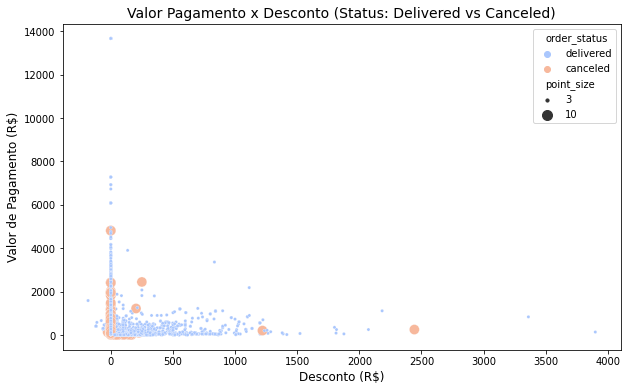

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


df_filtered['point_size'] = df_filtered['order_status'].apply(lambda x: 10 if x == 'canceled' else 3)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='desconto', y='payment_value', data=df_filtered, hue='order_status', palette='coolwarm', size='point_size', sizes=(10, 100))


plt.title('Valor Pagamento x Desconto (Status: Delivered vs Canceled)', fontsize=14)
plt.xlabel('Desconto (R$)', fontsize=12)
plt.ylabel('Valor de Pagamento (R$)', fontsize=12)


plt.show()

Foi verificado se os cancelamentos podem estar ligados a compras com descontos concedidos. Porém, a grande maioria dos pedidos cancelados não obteve descontos, podendo ser um incentivo para o cliente retornar a finalizar alguma outra compra, e até mesmo um motivador para futuros clientes, principalmente para aqueles que desejam comprar produtos com valores mais altos.